In [208]:
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.metrics.pairwise import euclidean_distances
import nltk

In [233]:
#save the third column in to tweets
file_cnnhealth= open('cnnhealth.txt',mode='r')
raw_tweets=[]
for line in file_cnnhealth:
    cnnhelath_column=line.split("|")
    raw_tweets.append(cnnhelath_column[2])
file_cnnhealth.close()
tweets = []
for num in raw_tweets:
  a = re.sub("http://\S+|https://\S+|http:/\S+|RT|@\S+|#","",num)
  tweets.append(a)
#print(tweets)

['An abundance of online info can turn us into e-hypochondriacs. Or, worse, lead us to neglect getting the care we need \n', 'A plant-based diet that incorporates fish may be the key to preventing colorectal cancers:  \n', "It doesn't take much to damage your hearing at a sports bar or nightclub. That's why a billion people are at risk. \n", '  Forever young? Discover this island’s secrets to longevity on TheWonderList w/    \n', '  Is post-traumatic stress disorder in your genes? A simple blood test may one day help tell you  \n', 'Maysoon Zayid, a touring standup comic with Cerebral Palsy, has a message to share.  \n', "How women can wipe out Alzheimer's, from    \n", '  Women can defeat Alzheimers, says  WipeOutAlz challenge will make it happen.  \n', 'Is it time to raise the legal smoking age?  \n', 'CDC: Misuse of garments may have led to release of bioterror bacteria at Tulane monkey lab. \n', "Losing a brain tumor, gaining perspective: CNN's Jessica Moskowitz's FirstPerson exper

In [234]:
#using sklearn to implement bag of words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweets)
feature_name = vectorizer.get_feature_names()  

In [235]:
#save sparse matrix of the bag of words
X.maxprint = X.shape[0]
with open('sparse_matrix.txt','w') as file:
    file.write(str(X))
    file.close()

In [236]:
#transform data into array and save it into features
features=X.toarray()
np.savetxt('features_matrix.txt',features,fmt='%d')       #save dense matrix of the bag of words

In [237]:
#Euclidean distance and optimize the best n_clusters
from sklearn.neighbors import DistanceMetric
Euclid_dist=DistanceMetric.get_metric('euclidean')

In [238]:
Euclid = []
Euclid=Euclid_dist.pairwise(features)

In [239]:
np.savetxt('Euclid_distance_matrix.txt',Euclid,fmt='%.2f')   #save euclid distance matrix in text file

Text(0.5, 1.0, 'SSE of k-Means versus number of clusters')

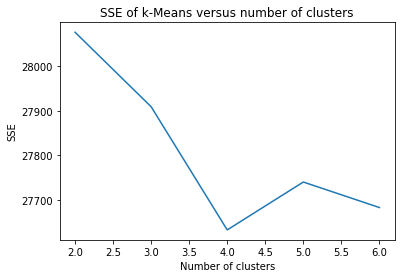

In [266]:
#using elbow metods for euclid distance to optimize the best n_clusters
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
scores = [KMeans(n_clusters=i+2).fit(features).inertia_ 
          for i in range(5)]
sns.lineplot(np.arange(2, 7), scores)
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.title("SSE of k-Means versus number of clusters")

In [241]:
print('accroding to elbow method, the best n_clusters for Euclidean is 4 and the SSE is: ',KMeans(n_clusters=4).fit(features).inertia_ )

accroding to elbow method, the best n_clusters for Euclidean is 4 and the SSE is:  27653.34978313434


In [282]:
from sklearn.metrics.pairwise import cosine_distances
Cosine_dis=[]
Cosine_dis=cosine_distances(features)
np.savetxt('Cosine_distance_matrix.txt',Cosine_dis,fmt='%.2f')

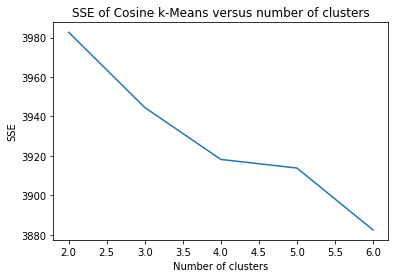

In [273]:
#Cosine distance and Euclidean distance are connected linearly for normalized vectors 
#we can simply normalize our data and optimize the best n_clusters for Cosine distance
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(features)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(5)]
sns.lineplot(np.arange(2, 7), scores)
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.title("SSE of Cosine k-Means versus number of clusters")
plt.savefig("SSE_cosine_kmeans.jpg", dpi=300)

In [244]:
print('accroding to elbow method, the best n_clusters for Cosine is 4 and the SSE is: ',KMeans(n_clusters=4).fit(normalized_vectors).inertia_ )

accroding to elbow method, the best n_clusters for Cosine is 4 and the SSE is:  3919.570259476227


In [245]:
# K-means clustering for Euclidiean distance, set init to k-means++ so that we don't need initialize mean manually
np.random.seed(87)
n_euclid=4
model = KMeans(n_clusters=n_euclid, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [246]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_euclid):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 smoking
 agree
 anti
 raising
 2nd
 law
 support
 record
 campaign
 voice
Cluster 1:
 kids
 help
 amp
 health
 cnnparents
 getfit
 brain
 mental
 new
 parents
Cluster 2:
 healthy
 eating
 getfit
 today
 food
 tip
 kids
 day
 ways
 make
Cluster 3:
 getfit
 health
 today
 new
 says
 cancer
 amp
 tip
 know
 brain


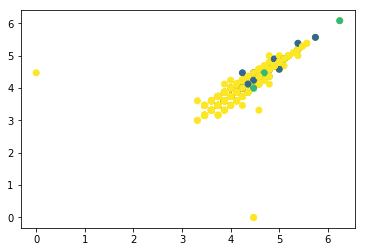

In [247]:
#plot scatter map of euclidian clustering
plt.scatter(Euclid[:,0], Euclid[:,1], c=model.labels_)

Text(0, 0.5, 'Cluster Size')

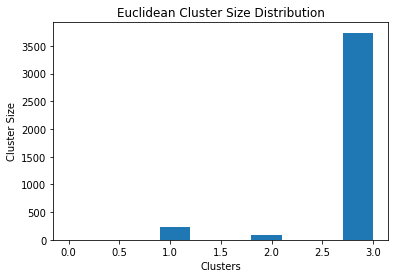

In [248]:
#plot histogram of euclidian clustering
plt.hist(model.labels_)
plt.title('Euclidean Cluster Size Distribution')
plt.xlabel('Clusters')
plt.ylabel('Cluster Size')

In [251]:
from nltk.cluster import KMeansClusterer
import nltk
n_cosinedist=4
cos_model = KMeansClusterer(n_cosinedist, distance=nltk.cluster.util.cosine_distance, repeats=25,avoid_empty_clusters=True)
assigned_clusters =cos_model.cluster(features, assign_clusters=True)

In [253]:
import pandas as pd
assigned_clusters_pd=pd.Series(assigned_clusters)

In [254]:
l_cos_cluster=list(assigned_clusters_pd.value_counts().index) 
l_num=list(assigned_clusters_pd.value_counts())

Text(0, 0.5, 'Cluster Size')

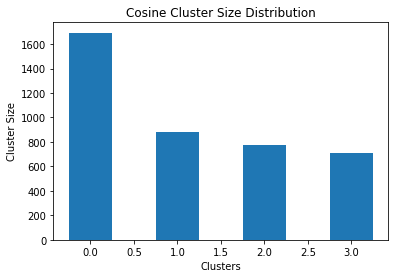

In [258]:
plt.bar(l_cos_cluster,l_num,width=0.5)
plt.title('Cosine Cluster Size Distribution')
plt.xlabel('Clusters')
plt.ylabel('Cluster Size')

In [281]:
Cos_labels=np.array(assigned_clusters)
print(Cosine_dist)

[]


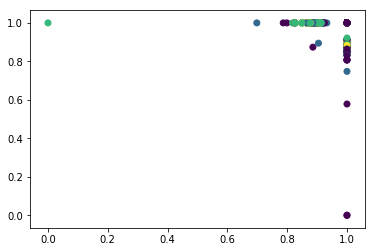

In [289]:
plt.scatter(Cosine_dis[:,0], Cosine_dis[:,1], c=Cos_labels)

In [304]:
from sklearn.metrics import silhouette_score
Euclid_cluster_labels = model.fit_predict(features) 
Euclid_silhouette = silhouette_score(features, Euclid_cluster_labels)
Cosine_silhouette =silhouette_score(features,Cos_labels)
print('The silhouette score of euclidean distance is:',Euclid_silhouette)
print('The silhouette score of cosine distance is:',Cosine_silhouette)

The silhouette score of euclidean distance is: 0.02453565163649236
The silhouette score of cosine distance is: 0.001397231673144061


In [314]:
#calculate the Calinski and Harabasz score for euclidean and cosine distance
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score_euclid = davies_bouldin_score(features, Euclid_cluster_labels)
davies_bouldin_score_Cosine=davies_bouldin_score(features, Cos_labels)
print('The  Calinski and Harabasz score of euclidean distance is:',davies_bouldin_score_euclid)
print('The  Calinski and Harabasz score of Cosine distance is:',davies_bouldin_score_Cosine)

The  Calinski and Harabasz score of euclidean distance is: 4.31061268957251
The  Calinski and Harabasz score of Cosine distance is: 11.727438007610099


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
